# Concentration de CO<sub>2</sub> dans l'atmosphère depuis 1958

## Téléchargement et ouverture des données

Nous allons commencer par importer les librairies nécéssaires :

1. Utilisation de la bibliothèque intégrée à Notebook (matplotlib inline)
2. Importation d'une bibliothèque pour les sorties graphique dans le nom "plt"
3. Importation d'une bibliothèque pratique pour la manipulation de données (tableaux, séries temporelles,...) dans le nom "pd"
4. Importation d'une bibliothèque pour faciliter la manipulation de tableaux, matrices, et opérations mathématiques dans le nom "np"
5. Importation d'un module qui permet de chercher des chemins locaux (os)
6. Importation d'un module qui défini des fonctions permettant d'ouvrir des URL dans des environnements complexes (urllib.request)
7. Importation d'un module pour faciliter les optimisations non linéaires ainsi que les problèmes d'ajustement de courbes (curve_fit)
8. Importation d'un module pour faciliter l'ajustement entre des données et une fonction mathématique par la méthode des moindres carrés (leastsq)

In [1]:
%matplotlib inline  
import matplotlib.pyplot as plt  
import pandas as pd 
import numpy as np     
import os
import urllib.request
from scipy.optimize import curve_fit
from scipy.optimize import leastsq

Les données d'évolution de la concentration de CO<sub>2</sub> atmosphérique au cours du temps sont disponibles sur le site Web de l'institut Scripps. Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée (un point de donnée un jour pour chaque semaine). Nous téléchargeons le jeu de données complet, qui commence en 1958 et se termine en 2020. Il est indiqué que les données du site sont disponible gratuitement, à condition qu'un crédit approprié y soit accordé. De ce fait, nous nous devons de citer ces deux articles :

C. D. Keeling, S. C. Piper, R. B. Bacastow, M. Wahlen, T. P. Whorf, M. Heimann, and H. A. Meijer, Exchanges of atmospheric CO2 and 13CO2 with the terrestrial biosphere and oceans from 1978 to 2000. I. Global aspects, SIO Reference Series, No. 01-06, Scripps Institution of Oceanography, San Diego, 88 pages, 2001.

C. D. Keeling, S. C. Piper, R. B. Bacastow, M. Wahlen, T. P. Whorf, M. Heimann, and H. A. Meijer, Atmospheric CO2 and 13CO2 exchange with the terrestrial biosphere and oceans from 1978 to 2000: observations and carbon cycle implications, pages 83-113, in "A History of Atmospheric CO2 and its effects on Plants, Animals, and Ecosystems", editors, Ehleringer, J.R., T. E. Cerling, M. D. Dearing, Springer Verlag, New York, 2005.

Téléchargeons maintenant le jeu de données complet, et enregistrons le localement, à condition qu'il n'existe pas déjà un fichier local avec ces mêmes données :

In [2]:
data_url = "https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/weekly/weekly_in_situ_co2_mlo.csv"
data_file = "daily_CO2.csv"                         # donnons leur un nom .csv
if not os.path.exists(data_file):                   # si le fichier local n'existe pas déjà
    urllib.request.urlretrieve(data_url, data_file) # alors on enregistre les données localement (via un URL local)

NB : Le jeu de données a été téléchargé le 11/04/2020

Nous regardons premièrement le fichier .csv téléchargé. Les 43 premières lignes sont composées de texte (date de mise en ligne des données, références à citer, composition du tableau de données) qu'il va donc falloir enlever via la commande skiprows.

In [3]:
raw_data = pd.read_csv(data_url,skiprows=43)
raw_data

indicated by the date in the first column.                             
1958-03-29                                             316.19                       
1958-04-05                                             317.31                       
1958-04-12                                             317.69                       
1958-04-19                                             317.58                       
1958-04-26                                             316.48                       
1958-05-03                                             316.95                       
1958-05-17                                             317.56                       
1958-05-24                                             317.99                       
1958-07-05                                             315.85                       
1958-07-12                                             315.85                       
1958-07-19                                             315.46                       
1958-07-26                                             315.59                       
1958-08-02                                             315.64                       
1958-08-09                                             315.10                       
1958-08-16                                             315.09                       
1958-08-30                                             314.14                       
1958-09-06                                             313.54                       
1958-11-08                                             313.05                       
1958-11-15                                             313.26                       
1958-11-22                                             313.57                       
1958-11-29                                             314.01                       
1958-12-06                                             314.56                       
1958-12-13                                             314.41                       
1958-12-20                                             314.77                       
1958-12-27                                             315.21                       
1959-01-03                                             315.24                       
1959-01-10                                             315.50                       
1959-01-17                                             315.69                       
1959-01-24                                             315.86                       
1959-01-31                                             315.42                       
...                                                       ...                       
2019-07-06                                             412.69                       
2019-07-13                                             412.30                       
2019-07-20                                             411.76                       
2019-07-27                                             410.32                       
2019-08-03                                             410.50                       
2019-08-10                                             410.48                       
2019-08-17                                             410.05                       
2019-08-24                                             409.52                       
2019-08-31                                             409.32                       
2019-09-07                                             408.80                       
2019-09-14                                             408.61                       
2019-09-21                                             408.50                       
2019-09-28                                             408.28                       
2019-10-05                                             407.99                       
2019-10-12                                             408.61                       
2019-10-19        

On voit que les données sont composées de la façon suivante :
-    colonne 1 : date en année-mois-jour. Du 29 mars 1958 au 01 février 2020. Avec une donnée par semaine, ajustée à  à midi du jour médian de la période hebdomadaire.
-    colonne 2 : la concentration de CO2 en micro-mole de CO2 par mole (ppm)

Les données manquantes ne sont pas indiquées, il faudra donc les identifier d'une autre façon que visuellement.

Nous observons que les dates sont vues ici par pandas comme des indices de ligne. De plus, les noms de colonne ne sont pas indiqués, les mots qui apparaissent sont ceux de la dernière ligne du texte du fichier .csv ("indicated by the date in the first column"). Nous allons donc changer cela pour mettre des noms de colonne adaptés, avec en première colonne la date, et en deuxième colonne la concentration en CO2.

In [4]:
data = raw_data.reset_index()
data.columns = ['Date YYYY-MM-DD','[CO2] ppm']
# data # à décommenter si l'on veut voir la modification

Nos données temporelles utilisent une convention année-mois-jours. Nous écrivons une petite fonction Python pour cela. Ensuite, nous l'appliquons à tous les points de nos donnés. Les résultats vont dans une nouvelle colonne 'period'.

In [5]:
# Convertissons l'objet colonne en datetime
datetime_period           = pd.to_datetime(data['Date YYYY-MM-DD'])
# Puis en périodes d'une semaine (dimanche au lundi) contenant le jour indiqué dans la date colonne 1
data['Period']            = datetime_period.dt.to_period('W')
# data # à décommenter  si l'on veut voir la modification

Il reste deux petites modifications à faire.

Premièrement, nous définissons les périodes d'observation
comme nouvel index de notre jeux de données. Ceci en fait
une suite chronologique, ce qui sera pratique par la suite.

Deuxièmement, nous trions les points par période, dans
le sens chronologique. Puis, par simplicité pour l'extrapolation que nous devons faire ensuite, nous créons une colonne "elapsed weeks" qui contient le temps accumulé à partir de zéro. 

In [6]:
# Periodes comme index du jeu de données
data['Index_period'] = data['Period']
sorted_data = data.set_index('Index_period').sort_index()
# Temps accumulé
sorted_data['elapsed_weeks'] = sorted_data['Period'] - sorted_data['Period'].iloc[0]
sorted_data['elapsed_weeks'] = sorted_data['elapsed_weeks'].astype(str).astype(int)

Nous vérifions la cohérence des données. Entre la fin d'une période et
le début de la période qui suit, la différence temporelle doit être
zéro, ou au moins très faible. Nous laissons une "marge d'erreur"
d'une seconde.

In [7]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

1958-04-28/1958-05-04 1958-05-12/1958-05-18
1958-05-19/1958-05-25 1958-06-30/1958-07-06
1958-08-11/1958-08-17 1958-08-25/1958-08-31
1958-09-01/1958-09-07 1958-11-03/1958-11-09
1959-01-26/1959-02-01 1959-02-09/1959-02-15
1959-03-02/1959-03-08 1959-03-16/1959-03-22
1959-05-18/1959-05-24 1959-06-01/1959-06-07
1959-08-03/1959-08-09 1959-08-17/1959-08-23
1962-08-13/1962-08-19 1962-09-10/1962-09-16
1962-12-17/1962-12-23 1962-12-31/1963-01-06
1963-02-04/1963-02-10 1963-02-18/1963-02-24
1963-04-22/1963-04-28 1963-05-06/1963-05-12
1963-11-11/1963-11-17 1963-11-25/1963-12-01
1964-01-13/1964-01-19 1964-05-25/1964-05-31
1964-06-01/1964-06-07 1964-06-22/1964-06-28
1964-07-27/1964-08-02 1964-08-10/1964-08-16
1966-07-04/1966-07-10 1966-08-01/1966-08-07
1966-10-24/1966-10-30 1966-11-07/1966-11-13
1967-01-09/1967-01-15 1967-01-30/1967-02-05
1976-06-14/1976-06-20 1976-06-28/1976-07-04
1984-03-19/1984-03-25 1984-04-23/1984-04-29
1985-07-22/1985-07-28 1985-08-05/1985-08-11
2003-06-02/2003-06-08 2003-06-16

Nous voyons là qu'il y a bien des données manquantes pour un certain nombre de périodes.

## Visualisation des données

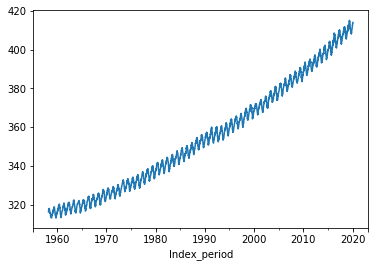

In [8]:
sorted_data['[CO2] ppm'].plot()

On aperçoit ici clairement l'évolution systématique de hausse quasi-exponentielle de la quantité de CO2 atmosphérique, attribuable à la hausse de combustion d'énergies fossiles depuis le début de la révolution industrielle, mais l'on devine aussi des variations de plus petite longueur d'onde. Un zoom sur les dernières années montre mieux encore ces variations que l'on devine alors saisonnières.

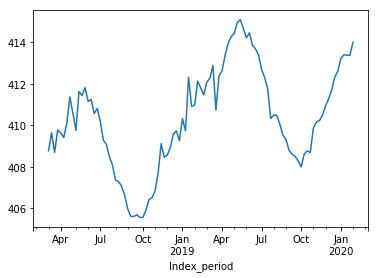

In [9]:
sorted_data['[CO2] ppm'][-100:].plot()

Nous voyons alors apparaître des pics de haute concentration de CO2 atmosphérique au printemps (mai), et des pics de plus basse concentration en automne (octobre) que l'on peut associer au captage du CO2 par la végétation mondiale dans l'hémisphère nord, où sont situées la majeure partie des terres émergées. A partir du printemps, les plantes se développent et captent le CO2 atmosphérique afin de réaliser leur photosynthèse : la concentration de CO2 atmosphérique mondiale décroît, jusqu'en automne où la végétation entre en repos et où en conséquence la concentration de CO2 atmosphérique commence à ré-augmenter.  

## Caractérisation de l'évolution lente

Maintenant, nous allons ajuster un polynôme à la tendance globale systématique afin d'une part, d'isoler cette tendance des variations saisonnières, et d'autre part de prolonger la tendance jusqu'en 2050.

Text(0.5,0,'Date')

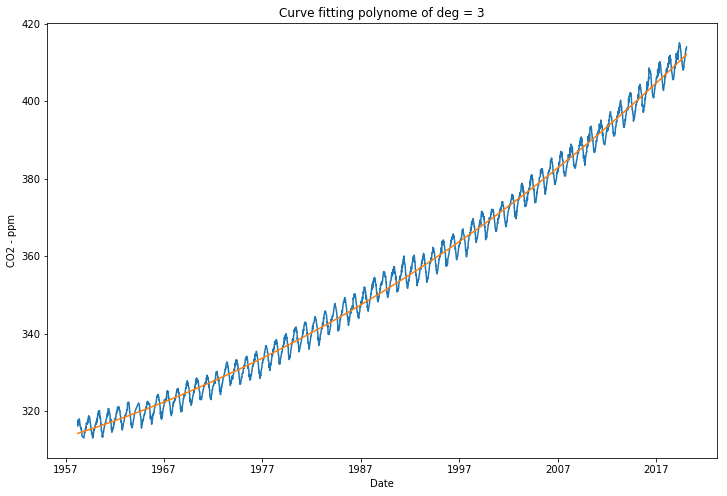

In [10]:
# Choix des axes 
y_values = sorted_data['[CO2] ppm']
x_values = sorted_data['elapsed_weeks']
# Choix du degré du polynôme ajusté aux données (choisi à 3 par essais-erreurs)
poly_degree = 3
# Rangeons les dates par ordre chronologique
sorted_datetime = datetime_period.sort_index()
# Créons le polynôme avec la fonction polyfit
coeffs = np.polyfit(x_values, y_values, poly_degree)
# Enregistrons ces coefs dans la variable poly_eqn
poly_eqn = np.poly1d(coeffs)
# Enregistrons les valeurs y (les concentrations en CO2 ajustées par le polynôme) dans y_hat
y_hat = poly_eqn(x_values)

# Visualisons :
plt.figure(figsize=(12,8))
plt.plot(sorted_datetime, sorted_data['[CO2] ppm'])
plt.plot(sorted_datetime,y_hat)
plt.title('Curve fitting polynome of deg = 3')
plt.ylabel('CO2 - ppm')
plt.xlabel('Date')

Nous proposons donc un modèle simple pour l'évolution lente, comme un polynome de degré 3, et d'équation : y(x) = a + b.x + c.x<sup>2</sup> + d.x<sup>3</sup> avec les paramètres a = 3.14e+02; b = 1.59e-02; c = 3.86e-06; d = 1.87e-10 (arrondis à deux chiffres après la virgule).

## Caractérisation de l'oscillation périodique

Nous soustrayons l'évolution lente ajustée par le polynome aux données pour ne visualiser que l'impact saisonnier. 

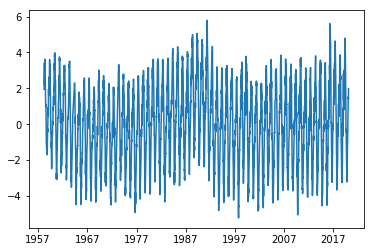

In [11]:
season = sorted_data['[CO2] ppm'] - y_hat
plt.plot(sorted_datetime, season)

NB : On observe que malgré ce traitement, il reste encore une variation de plus grande longueur d'onde que les variations saisonnières.

Observons de plus près les variations saisonnières ainsi corrigées (zoom sur les 2 dernières années) :

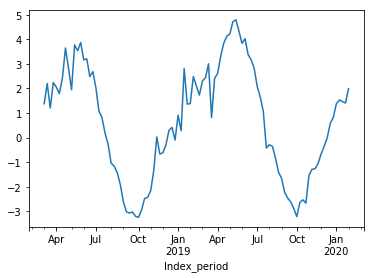

In [12]:
season[-100:].plot()

Maintenant, enlevons la tendance sinusoïdale de grande longueur d'onde (période d'~35 ans) que l'on observe.
On va faire cela en créant une fonction sinusoïdale de paramètres : pulsation, fréquence et phase qui correspond à première vue assez bien aux observations. Ensuite, nous allons ajuster cette fonction à nos données par la méthode des moindres carrés. Enfin, nous oterons ce signal ainsi caractérisé aux données "season" afin de les caractériser plus proprement.

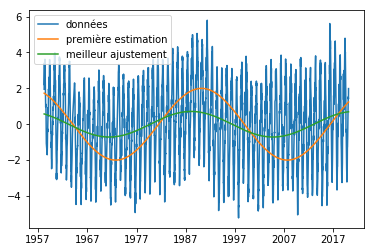

In [13]:
# Ajustement de la tendance grande longueur d'onde

# Définitions des données x et y
x_values = sorted_data['elapsed_weeks']
y_values = season

# Paramètres que nous proposons pour la fonction sinusoïdale
guess_phase = np.pi/1.5
guess_puls = 2*np.pi/(52*35)
guess_amp = 2

# Création de la fonction
data_first_guess = guess_amp*np.sin(guess_puls*x_values+guess_phase)

# Définition de la fonction à optimiser, ici c'est la différence entre la sinusoïde 
# que nous venons de créer et les données saisonnières
optimize_func = lambda x: x[0]*np.sin(x[1]*x_values+x[2]) - y_values
# Optimisation des paramètres de la sinusoïde par méthode des moindres carrés
est_amp, est_puls, est_phase = leastsq(optimize_func, [guess_amp, guess_puls, guess_phase])[0]

# Nouvelle fonction optimisée
data_fit = est_amp*np.sin(est_puls*x_values+est_phase)

# Pour visualiser les deux fonctions et les données
plt.plot(sorted_datetime,y_values,label='données')      
plt.plot(sorted_datetime,data_first_guess,label='première estimation') 
plt.plot(sorted_datetime,data_fit,label='meilleur ajustement')
plt.legend()
plt.show()

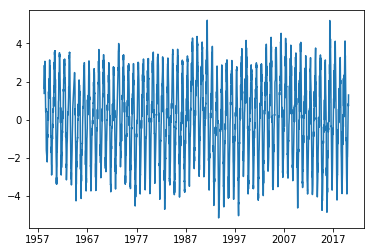

In [14]:
# Enlevons la tendance grande longueur d'onde à nos données saisonnières
really_seasonal = y_values - data_fit
plt.plot(sorted_datetime,really_seasonal,label='données') 

Nous allons maintenant essayer d'ajuster la courbe de variations saisonnières ainsi corrigée avec une fonction sinusoïdale afin de mieux caractériser les paramètres de cette tendance saisonnière. Pour cela, nous commençons par créer une fonction sinusoïdale avec des paramètres supposés issus de l'observation des graphiques ci-dessus.

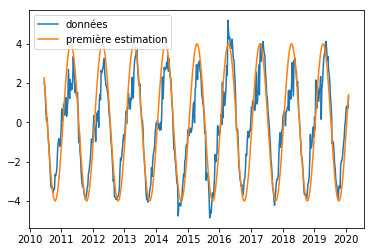

In [15]:
# Définitions des données x et y
x_values = sorted_data['elapsed_weeks']
y_values = really_seasonal

# Paramètres que nous proposons pour la fonction sinusoïdale
guess_phase = 0
guess_puls = 2*np.pi/52
guess_amp = 4

# Création de la fonction
data_first_guess = guess_amp*np.sin(guess_puls*x_values+guess_phase)

# Visualisation de la sinusoïde sur les données depuis 2010 (zoom pour y voir plus clair)
plt.plot(sorted_datetime[-500:],y_values[-500:],label='données')      
plt.plot(sorted_datetime[-500:],data_first_guess[-500:],label='première estimation') 
plt.legend()
plt.show()

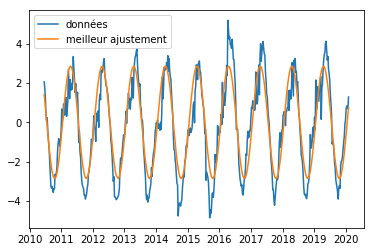

In [16]:
# Définition de la fonction à optimiser, ici c'est la différence entre la sinusoïde 
# que nous venons de créer et les données saisonnières
optimize_func = lambda x: x[0]*np.sin(x[1]*x_values+x[2]) - y_values
# Optimisation des paramètres de la sinusoïde par méthode des moindres carrés
est_amp, est_puls, est_phase = leastsq(optimize_func, [guess_amp, guess_puls, guess_phase])[0]

# Nouvelle fonction optimisée
data_fit = est_amp*np.sin(est_puls*x_values+est_phase)

# Visualisation de cette fonction sur les données depuis 2010 (zoom pour y voir plus clair)
plt.plot(sorted_datetime[-500:],y_values[-500:],label='données')       
plt.plot(sorted_datetime[-500:],data_fit[-500:],label='meilleur ajustement')
plt.legend()
plt.show()

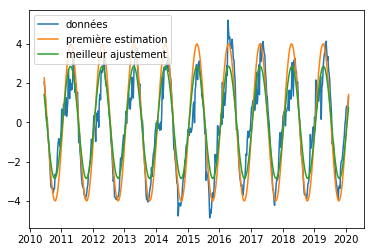

In [17]:
# Pour visualiser les deux tendances
plt.plot(sorted_datetime[-500:],y_values[-500:],label='données')      
plt.plot(sorted_datetime[-500:],data_first_guess[-500:],label='première estimation') 
plt.plot(sorted_datetime[-500:],data_fit[-500:],label='meilleur ajustement')
plt.legend()
plt.show()

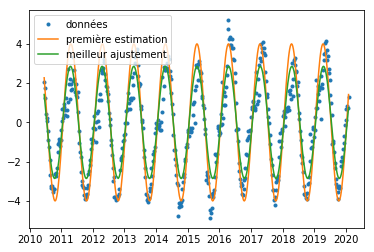

In [18]:
# Visualisation avec les données ponctuelles
plt.plot(sorted_datetime[-500:],y_values[-500:],'.',label='données')      
plt.plot(sorted_datetime[-500:],data_first_guess[-500:],label='première estimation') 
plt.plot(sorted_datetime[-500:],data_fit[-500:],label='meilleur ajustement')
plt.legend()
plt.show()

NB : cet ajustement semble visuellement moins bon que la première sinusoïde proposée, mais attention, on ne visualise ici qu'une partie des données, alors que l'optimisation se fait sur l'ensemble des données.

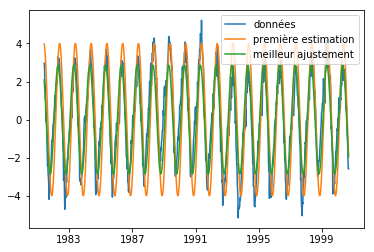

In [19]:
# Pour visualiser les deux tendances sur une autre période de temps , et plus longue
plt.plot(sorted_datetime[-2000 : -1000],y_values[-2000 : -1000],label='données')      
plt.plot(sorted_datetime[-2000 : -1000],data_first_guess[-2000 : -1000],label='première estimation') 
plt.plot(sorted_datetime[-2000 : -1000],data_fit[-2000 : -1000],label='meilleur ajustement')
plt.legend()
plt.show()

Nous proposons donc un modèle très simple pour l'évolution saisonnière, comme une variation sinusoïdale de paramètres : amplitude = 2.86 ; fréquence = pulsation/2/pi = 0.019 (=> de période T = 1/f = 52.15 semaines soit environ 1 an) ; déphasage = 1.07 . 

## Extrapolation de la tendance globale lente jusqu'en 2025

Nous allons maintenant créer un nouveau tableau (pandas dataframe) afin d'extrapoler les courbes jusqu'en 2025

Text(0.5,0,'Date')

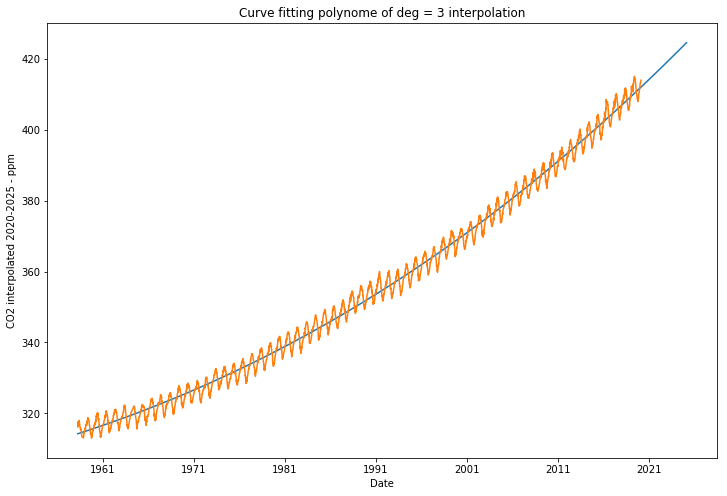

In [20]:
# Poursuite du tableau de temps
from datetime import datetime, timedelta
new_times = pd.date_range('2020-02-02', '2025-02-02', freq='W').to_datetime()
extrapolated_dates = np.append(datetime_period,new_times) 

# Création d'un nouveau tableau pandas avec les dates allant jusqu'en 2025
interp_data = pd.DataFrame(data=extrapolated_dates, columns=["Date YYYY-MM-DD"])
# Création d'une colonne de ces périodes
interp_data['interp_period'] = interp_data["Date YYYY-MM-DD"].dt.to_period('W')
interp_data
# Mettons ces périodes en semaines écoulés depuis la première donnée
interp_data['elapsed_interp_weeks'] = interp_data['interp_period'] - interp_data['interp_period'].iloc[0]
interp_data['elapsed_interp_weeks'] = interp_data['elapsed_interp_weeks'].astype(str).astype(int) 

# Visualisation
x = interp_data['elapsed_interp_weeks']
y = [] #y_hat
for i in range(len(x)):
    y.append(coeffs[0]*x[i]**3 + coeffs[1]*x[i]**2 + coeffs[2]*x[i] + coeffs[3])

plot_datetime = interp_data["Date YYYY-MM-DD"].sort_index()

plt.figure(figsize=(12,8))
plt.plot(plot_datetime,y)
plt.plot(sorted_datetime, sorted_data['[CO2] ppm'])
plt.title('Curve fitting polynome of deg = 3 interpolation')
plt.ylabel('CO2 interpolated 2020-2025 - ppm')
plt.xlabel('Date')

Voici donc la tendance que nous proposons jusqu'en 2025 par interpolation des données sur ces 60 et quelques dernières années. Cependant, il est possible (et beau ? et trop optimiste ?) de penser que cette crise du CoVid-19 qui touche actuellement notre planète depuis février, avec ce qu'elle implique de blocage du traffic aérien et routier pour beaucoup de civils, ainsi que l'arrêt ou diminution de la production pour un grand nombre d'entreprises émettrices de gaz à effet de serre de par le monde, aura une influence sur la concentration en CO2 dans l'atmosphère. Sur le tendance saisonnière, très certainement, nous devrions apercevoir une diminution de la concentration en CO2 par rapport aux autres années. Sur la tendance globale, il faudrait plus de deux mois de ce changement de l'activité humaine...mais pouvons nous espérer un changement dans les mentalités à notre sortie du confinement, qui encrerait ce changement d'habitudes dans le temps ?
Plus d'infos sur dans l'article de National Geograohic du 7 avril 2020 : https://www.nationalgeographic.fr/environnement/2020/04/coronavirus-les-emissions-carbone-en-chute-libre-mais-pour-combien-de-temps
Ou encore de Ouest France : https://www.ouest-france.fr/leditiondusoir/data/82939/reader/reader.html#!preferred/1/package/82939/pub/117257/page/6
Ou bien de Climate Home News directement d'après les données de l'observatoire du Mauna Loa : https://www.climatechangenews.com/2020/03/26/coronavirus-hawaii-scientists-seek-signs-economic-slowdown-air/